In [1]:
import os

import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelBinarizer

import tensorflow as tf
from tensorflow.keras import layers, models

2021-12-13 16:49:06.804197: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-12-13 16:49:06.804231: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
HOUSES_DIRECTORY_PATH = "/media/fabsam/Data/dataset_deddiag/house_"
PARTICIPANTS_DIRECTORY = "/home/fabsam/Documenti/university/masterDegree/thesis/Decentralized-SmartGrid-ML/data_sample/appliance_classification_task/participants/"
VALIDATOR_DIRECTORY = "/home/fabsam/Documenti/university/masterDegree/thesis/Decentralized-SmartGrid-ML/data_sample/appliance_classification_task/validator/"
items_file_name = "items.tsv"
annotations_file_template = "item_%s_annotations.tsv"
data_file_template = "item_%s_data.tsv"

In [7]:
def extract_features(df_data_house):
    df_data_house["time"] = pd.to_datetime(df_data_house["time"])
    df_data_house["year"] = df_data_house["time"].apply(lambda datetime : datetime.year)
    df_data_house["day_of_week"] = df_data_house["time"].apply(lambda datetime : datetime.day_of_week)
    df_data_house["day"] = df_data_house["time"].apply(lambda datetime : datetime.day)
    df_data_house["month"] = df_data_house["time"].apply(lambda datetime : datetime.month)
    df_data_house["hour"] = df_data_house["time"].apply(lambda datetime : datetime.hour)
    df_data_house["minute"] = df_data_house["time"].apply(lambda datetime : datetime.minute)
    df_data_house["second"] = df_data_house["time"].apply(lambda datetime : datetime.second)
    df_data_house["is_weekend"] = df_data_house["day_of_week"].apply(lambda day_of_week: 1 if day_of_week in [5, 6] else 0)
    df_data_house.drop(columns=["time"], inplace=True)
    return df_data_house

# READ HOUSES DATA

In [8]:
houses_names = ["02", "03", "04"]
participants_ids = ["0", "1", "2"]
assert(len(houses_names) == len(participants_ids))

Extract items' info and annotations info

In [21]:
n_rows = 1000000

In [22]:
df_data_houses = [] 
houses_items_info = []
categories_set = set()

for house_name in houses_names:
    items_info = {
        "item_id": [],
        "category": []
    }
    category2item_id = {}

   
    path_items = os.path.join(
        HOUSES_DIRECTORY_PATH + house_name,
        items_file_name
    )
    print("Reading from %s" % path_items)
    df_items = pd.read_csv(
        path_items, sep='\t'
    )
    for item_id, category in zip(df_items["item_id"], df_items["category"]):
        items_info["item_id"].append(item_id)
        items_info["category"].append(category)
        category2item_id[category] = "00" + str(item_id)
    display(pd.DataFrame.from_dict(items_info))
    #for k, v in category2item_id.items():
    #    print(k, ": ", v)    
    
    houses_items_info.append(items_info)
    
    categories = list(category2item_id.keys())
    df_categories_data = [] 
    for category in categories:
        categories_set.add(category)
        print("CATEGORY: ", category)

        #rows_read = 0
        
        df_data = pd.read_csv(
            os.path.join(
                HOUSES_DIRECTORY_PATH + house_name,
                data_file_template % category2item_id[category]
            ), sep='\t', nrows=n_rows
        )
        
        df_data = extract_features(df_data)
        df_data = statistics_per_minute = df_data.groupby(['year', 'month', 'day', 'day_of_week', 'hour', 'minute'], as_index=False).agg(
            # Get max of the duration column for each group
            max_value=('value', max),
            # Get min of the duration column for each group
            min_value=('value', min),
            # Get sum of the duration column for each group
            mean_value=('value', 'mean'),
        )
        df_data.drop(df_data[(df_data["mean_value"]==0)].index, inplace=True)
        df_data["category"] = [category for i in range(len(df_data))]
        display(df_data.head(5))
        df_categories_data.append(df_data)
    df_data_houses.append(df_categories_data)

Reading from /media/fabsam/Data/dataset_deddiag/house_02/items.tsv


,item_id,category
0,11,Freezer
1,12,Washing Machine


CATEGORY:  Freezer


,year,month,day,day_of_week,hour,minute,max_value,min_value,mean_value,category
0,2017,4,25,1,19,3,0.920795,0.528354,0.801667,Freezer
1,2017,4,25,1,19,4,0.907672,0.677852,0.793763,Freezer
2,2017,4,25,1,19,5,0.931214,0.677391,0.801148,Freezer
3,2017,4,25,1,19,6,0.900484,0.657607,0.810303,Freezer
4,2017,4,25,1,19,7,0.907276,0.666839,0.806883,Freezer


CATEGORY:  Washing Machine


,year,month,day,day_of_week,hour,minute,max_value,min_value,mean_value,category
0,2016,12,8,3,15,24,0.270508,0.0,0.135254,Washing Machine
1,2016,12,8,3,16,3,0.292995,0.0,0.146498,Washing Machine
3,2016,12,8,3,16,15,0.287126,0.0,0.143563,Washing Machine
4,2016,12,8,3,16,50,0.274201,0.0,0.137101,Washing Machine
5,2016,12,8,3,18,12,0.270244,0.0,0.135122,Washing Machine


Reading from /media/fabsam/Data/dataset_deddiag/house_03/items.tsv


,item_id,category
0,16,Refrigerator
1,14,Washing Machine
2,13,Freezer


CATEGORY:  Refrigerator


,year,month,day,day_of_week,hour,minute,max_value,min_value,mean_value,category
0,2017,4,27,3,9,20,31.022606,30.648035,30.870562,Refrigerator
1,2017,4,27,3,9,21,31.116711,30.698353,30.922780,Refrigerator
2,2017,4,27,3,9,22,31.087496,30.691032,30.849480,Refrigerator
3,2017,4,27,3,9,23,31.011000,30.468138,30.758616,Refrigerator
4,2017,4,27,3,9,24,30.976906,30.584465,30.796231,Refrigerator


CATEGORY:  Washing Machine


,year,month,day,day_of_week,hour,minute,max_value,min_value,mean_value,category
0,2016,12,20,1,9,18,2.794434,1.663933,2.402776,Washing Machine
1,2016,12,20,1,9,19,2.827671,2.609194,2.704953,Washing Machine
2,2016,12,20,1,9,20,2.821802,2.586047,2.721913,Washing Machine
3,2016,12,20,1,9,21,2.827737,2.589740,2.719404,Washing Machine
4,2016,12,20,1,9,22,2.814614,2.608930,2.698190,Washing Machine


CATEGORY:  Freezer


,year,month,day,day_of_week,hour,minute,max_value,min_value,mean_value,category
0,2017,4,27,3,9,20,0.906023,0.655629,0.771735,Freezer
1,2017,4,27,3,9,21,0.917761,0.566141,0.767284,Freezer
2,2017,4,27,3,9,22,0.880436,0.634196,0.771139,Freezer
3,2017,4,27,3,9,23,0.945393,0.550842,0.774290,Freezer
4,2017,4,27,3,9,24,0.939721,0.690382,0.778979,Freezer


Reading from /media/fabsam/Data/dataset_deddiag/house_04/items.tsv


,item_id,category
0,20,Washing Machine
1,17,Refrigerator
2,18,Freezer
3,19,Dish Washer


CATEGORY:  Washing Machine


,year,month,day,day_of_week,hour,minute,max_value,min_value,mean_value,category
10,2017,4,17,0,19,51,0.921586,0.000000,0.700115,Washing Machine
15,2017,4,17,0,23,33,0.275586,0.000000,0.137793,Washing Machine
23,2017,4,18,1,6,33,72.836243,0.883470,11.673287,Washing Machine
24,2017,4,18,1,6,34,18.924866,3.452899,9.820183,Washing Machine
25,2017,4,18,1,6,35,251.459320,0.905364,17.338659,Washing Machine


CATEGORY:  Refrigerator


,year,month,day,day_of_week,hour,minute,max_value,min_value,mean_value,category
3,2017,4,17,0,21,50,891.336975,90.782219,223.329002,Refrigerator
4,2017,4,17,0,21,51,90.253601,77.919838,82.416451,Refrigerator
5,2017,4,17,0,21,52,87.203560,84.411102,86.098425,Refrigerator
6,2017,4,17,0,21,53,86.828659,85.243996,86.052447,Refrigerator
7,2017,4,17,0,21,54,86.026764,84.993599,85.592118,Refrigerator


CATEGORY:  Freezer


,year,month,day,day_of_week,hour,minute,max_value,min_value,mean_value,category
0,2017,4,17,0,19,15,83.763519,83.029419,83.443624,Freezer
1,2017,4,17,0,19,16,83.333626,82.726204,83.021516,Freezer
2,2017,4,17,0,19,17,83.132492,82.066025,82.641436,Freezer
3,2017,4,17,0,19,18,82.636513,81.867729,82.262554,Freezer
4,2017,4,17,0,19,19,82.263725,81.562599,81.843931,Freezer


CATEGORY:  Dish Washer


,year,month,day,day_of_week,hour,minute,max_value,min_value,mean_value,category
0,2017,4,17,0,19,51,0.886042,0.000000,0.665707,Dish Washer
13,2017,4,18,1,6,37,18.543371,0.604455,11.862292,Dish Washer
14,2017,4,18,1,6,38,176.455124,11.232736,81.106483,Dish Washer
15,2017,4,18,1,6,39,91.128563,68.147400,73.012330,Dish Washer
16,2017,4,18,1,6,40,78.780167,67.976135,73.044005,Dish Washer


In [23]:
df_houses_datasets = []
df_houses_labels = []

for df_data_house in df_data_houses:
    df_dataset = df_data_house[0]
    for i in range(1, len(df_data_house)):
        df_dataset = df_dataset.append(df_data_house[i])
    labels = df_dataset["category"]
    df_dataset.drop("category", axis=1, inplace=True)
    df_dataset["month"] /= 12 
    df_dataset["day"] /= 30
    df_dataset["day_of_week"] /= 6
    df_dataset["hour"] /= 24
    df_dataset["minute"] /= 60
    df_dataset.drop("year", axis=1, inplace=True)
    #df_dataset["max_value"] /= max(df_dataset["max_value"])
    #df_dataset["min_value"] /= max(df_dataset["min_value"])
    #df_dataset["mean_value"] /= max(df_dataset["mean_value"])
    
    df_houses_datasets.append(df_dataset)
    df_houses_labels.append(labels)

In [28]:
for df_house_dataset in df_houses_datasets:
    display(df_house_dataset.head(5))

,month,day,day_of_week,hour,minute,max_value,min_value,mean_value
0,0.333333,0.833333,0.166667,0.791667,0.050000,0.920795,0.528354,0.801667
1,0.333333,0.833333,0.166667,0.791667,0.066667,0.907672,0.677852,0.793763
2,0.333333,0.833333,0.166667,0.791667,0.083333,0.931214,0.677391,0.801148
3,0.333333,0.833333,0.166667,0.791667,0.100000,0.900484,0.657607,0.810303
4,0.333333,0.833333,0.166667,0.791667,0.116667,0.907276,0.666839,0.806883


,month,day,day_of_week,hour,minute,max_value,min_value,mean_value
0,0.333333,0.9,0.5,0.375,0.333333,31.022606,30.648035,30.870562
1,0.333333,0.9,0.5,0.375,0.350000,31.116711,30.698353,30.922780
2,0.333333,0.9,0.5,0.375,0.366667,31.087496,30.691032,30.849480
3,0.333333,0.9,0.5,0.375,0.383333,31.011000,30.468138,30.758616
4,0.333333,0.9,0.5,0.375,0.400000,30.976906,30.584465,30.796231


,month,day,day_of_week,hour,minute,max_value,min_value,mean_value
10,0.333333,0.566667,0.000000,0.791667,0.850000,0.921586,0.000000,0.700115
15,0.333333,0.566667,0.000000,0.958333,0.550000,0.275586,0.000000,0.137793
23,0.333333,0.600000,0.166667,0.250000,0.550000,72.836243,0.883470,11.673287
24,0.333333,0.600000,0.166667,0.250000,0.566667,18.924866,3.452899,9.820183
25,0.333333,0.600000,0.166667,0.250000,0.583333,251.459320,0.905364,17.338659


In [29]:
print(categories_set)
labels_encoder = LabelBinarizer()
labels_encoder.fit(list(categories_set))
print(labels_encoder.classes_)

{'Freezer', 'Washing Machine', 'Refrigerator', 'Dish Washer'}
['Dish Washer' 'Freezer' 'Refrigerator' 'Washing Machine']


In [30]:
final_houses_datasets = []
for df_house, labels_house in zip(df_houses_datasets, df_houses_labels):
    df_features_and_labels = df_house.copy()
    one_hot_labels = labels_encoder.transform(labels_house)
    one_hot_classes_dict = {}
    for single_class in labels_encoder.classes_:
        one_hot_classes_dict["is " + single_class] = [0 for _ in range(len(one_hot_labels))]
    for idx_example, one_hot_class_example in enumerate(one_hot_labels):
        idx_class = one_hot_class_example.argmax()
        one_hot_classes_dict["is " + labels_encoder.classes_[idx_class]][idx_example] = 1 
    for k, values in one_hot_classes_dict.items():
        df_features_and_labels[k] = values
    final_houses_datasets.append(df_features_and_labels)

In [31]:
for participant_id, participant_dataset in zip(participants_ids, final_houses_datasets):
    participant_dataset_path = os.path.join(
        PARTICIPANTS_DIRECTORY + "participant_" + participant_id,
        "appliance_classification_task_"+ participant_id + ".csv"
    )
    participant_dataset.to_csv(participant_dataset_path, index=False)

Write the test set in the validator directory

# TO CHANGE WITH AN UNSEEN TEST SET

In [16]:
validator_dataset_path = os.path.join(
        VALIDATOR_DIRECTORY,
        "appliance_classification_task_test.csv"
    )
participant_dataset.to_csv(validator_dataset_path, index=False)

### Global model

In [60]:
columns_y = ["is " + single_class for single_class in labels_encoder.classes_]
print(columns_y)

['is Dish Washer', 'is Freezer', 'is Refrigerator', 'is Washing Machine']


In [79]:
houses_dataset = []
houses_labels = []
whole_dataset = []
for i in range(len(final_houses_datasets)):
    labels_house = final_houses_datasets[i][columns_y]
    houses_labels.append(labels_house.values)
    features_house = final_houses_datasets[i].drop(columns_y, axis=1)
    houses_dataset.append(features_house.values)
    whole_dataset.append(final_houses_datasets[i])
    #houses_dataset = houses_dataset.append(final_houses_datasets[i])
    #houses_labels = houses_labels.append(df_houses_labels[i])

In [80]:
houses_dataset = np.concatenate(houses_dataset)
houses_labels = np.concatenate(houses_labels)
whole_dataset = np.concatenate(whole_dataset)

In [81]:
assert(len(houses_dataset) == len(houses_labels))

Save the whole dataset

In [84]:
dataset_train, dataset_test = train_test_split(whole_dataset, random_state=42, test_size=0.1, shuffle=True)
pd.DataFrame(dataset_train, columns=final_houses_datasets[0].columns).to_csv(
    "/home/fabsam/Documenti/university/masterDegree/thesis/Decentralized-SmartGrid-ML/data_sample/appliance_classification_task/appliance_classification_task.csv",
    index=False
)
pd.DataFrame(dataset_test, columns=final_houses_datasets[0].columns).to_csv(validator_dataset_path, index=False)

In [64]:
x_train, x_test, y_train, y_test = train_test_split(houses_dataset, houses_labels, random_state=42, test_size=0.2, shuffle=True)

In [65]:
len(houses_dataset)

19405

One-hot encoding of labels

In [66]:
print(categories_set)
labels_encoder = LabelBinarizer()
labels_encoder.fit(list(categories_set))
print(labels_encoder.classes_)

{'Washing Machine', 'Dish Washer', 'Freezer', 'Refrigerator'}
['Dish Washer' 'Freezer' 'Refrigerator' 'Washing Machine']


In [67]:
classes = list(labels_encoder.classes_)
print(classes)

['Dish Washer', 'Freezer', 'Refrigerator', 'Washing Machine']


In [68]:
def create_model():
    model = models.Sequential()
    model.add(layers.Dense(128, activation="relu"))
    model.add(layers.Dense(32, activation="relu"))
    model.add(layers.Dense(len(classes), activation="softmax"))
    model.compile(
        optimizer="adam",
        loss="categorical_crossentropy",
        metrics=["accuracy"]
    )
    return model

In [69]:
model = create_model()

In [70]:
model.evaluate(x_test, y_test)

122/122 [==============================] - 0s 1ms/step - loss: 67.8046 - accuracy: 0.1778


[67.80455780029297, 0.17778922617435455]

In [71]:
history = model.fit(
    x_train, y_train, 
    epochs=20, batch_size=16, 
    validation_data=(x_test, y_test),
    verbose=1
)

Epoch 1/20
971/971 [==============================] - 2s 2ms/step - loss: 3.1661 - accuracy: 0.6042 - val_loss: 0.7511 - val_accuracy: 0.7362
Epoch 2/20
971/971 [==============================] - 1s 2ms/step - loss: 1.1406 - accuracy: 0.7177 - val_loss: 0.7717 - val_accuracy: 0.7982
Epoch 3/20
971/971 [==============================] - 1s 2ms/step - loss: 0.9313 - accuracy: 0.7496 - val_loss: 0.6698 - val_accuracy: 0.7769
Epoch 4/20
971/971 [==============================] - 1s 2ms/step - loss: 0.7139 - accuracy: 0.7865 - val_loss: 0.5201 - val_accuracy: 0.7797
Epoch 5/20
971/971 [==============================] - 2s 2ms/step - loss: 0.7777 - accuracy: 0.7896 - val_loss: 0.6499 - val_accuracy: 0.8766
Epoch 6/20
971/971 [==============================] - 1s 2ms/step - loss: 0.5242 - accuracy: 0.8290 - val_loss: 0.5913 - val_accuracy: 0.8073
Epoch 7/20
971/971 [==============================] - 2s 2ms/step - loss: 0.5519 - accuracy: 0.8363 - val_loss: 0.4260 - val_accuracy: 0.8650
Epoch 

In [72]:
def plot_metrics_per_epoch(history, metric_name):
    history_metric = history.history[metric_name]
    val_history_metric = history.history["val_" + metric_name]
    epochs = [i + 1 for i in range(len(history_metric))]
    plt.plot(epochs, history_metric, label="train set")
    plt.plot(epochs, val_history_metric, label="test_set")
    plt.xlabel("Epochs")
    plt.ylabel(metric_name)
    plt.legend()
    plt.title(metric_name.upper())
    plt.xticks(range(0, len(history_metric)+1, 2))
    plt.show()

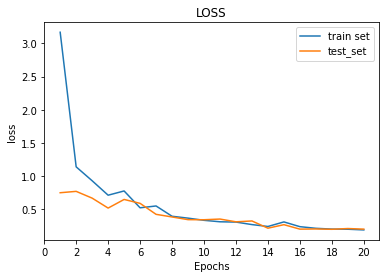

In [73]:
plot_metrics_per_epoch(history, "loss")

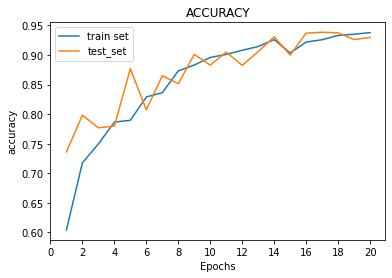

In [74]:
plot_metrics_per_epoch(history, "accuracy")

In [75]:
predictions = model.predict(x_test)
labels_predictions = labels_encoder.inverse_transform(predictions)
print(classification_report(labels_encoder.inverse_transform(y_test), labels_predictions))

                 precision    recall  f1-score   support

    Dish Washer       0.84      0.84      0.84       332
        Freezer       0.86      0.99      0.92      1112
   Refrigerator       0.99      0.84      0.91       690
Washing Machine       0.98      0.95      0.96      1747

       accuracy                           0.93      3881
      macro avg       0.92      0.90      0.91      3881
   weighted avg       0.93      0.93      0.93      3881



## Partial models

In [ ]:
for df_dataset, labels in zip(df_houses_datasets, df_houses_labels):
    x_train, x_test, y_train, y_test = train_test_split(df_dataset, labels, random_state=42, test_size=0.2, shuffle=True)
    predictions = model.predict(x_test)
    labels_predictions = labels_encoder.inverse_transform(predictions)
    print(classification_report(y_test, labels_predictions))

# Simple approach with a model from scikit-learn

In [ ]:
clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)
predictions = clf.predict(x_test)
print(classification_report(y_test, predictions))